- 存在于这个linear_model中，说明逻辑斯蒂回归和**线性回归**，有关系！！
- 逻辑斯蒂回归内部，是一个 **<span style="color:red">线性回归模型 + sigmoid函数</span>** ，进行概率的转化
- 概率 0 到 1 根据数字的大小，分类 设置阈值 < 0.5 甲类，大于等于 0.5 乙类
- 关键：逻辑斯蒂回归用于 **<span style="color:red">解决分类问题</span>**
- 逻辑斯蒂回归，名字虽然带着回归，不可以解决回归问题，它是一个 **<span style="color:red">分类算法</span>**
    - 老婆饼，没有老婆
    - 红烧狮子头，有狮子吗？

### 逻辑斯蒂回归使用

In [1]:
from sklearn.linear_model import LogisticRegression # 逻辑斯蒂回归
import numpy as np
import matplotlib.pyplot as plt

#### sigmoid曲线绘制

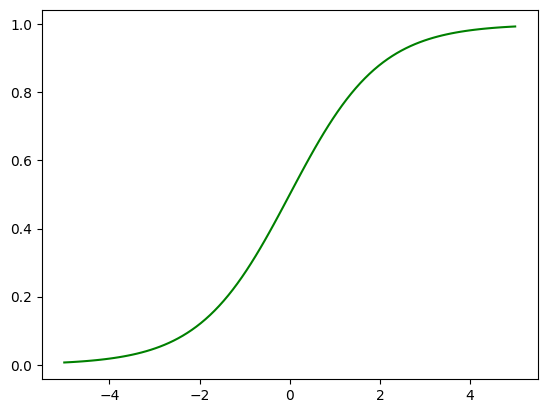

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

x = np.linspace(-5,5,100)
y = sigmoid(x)
plt.plot(x,y,color = 'green')

### 逻辑斯蒂回归分类

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

#### 加载数据

In [3]:
X,y = load_iris(return_X_y=True)  # 直接返回数据
display(X.shape,y)

(150, 4)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 拆分

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15) # 15%保留作为测试数据
display(X_train.shape,X_test.shape)

(127, 4)

(23, 4)

#### 建模

In [5]:
model = LogisticRegression(max_iter=1000) # 迭代次数，和梯度下降有关，默认的参数使100，没有拟合好，需要提升参数的次数

model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

#### 预测

In [6]:
y_ = model.predict(X_test)
display('真实类别：',y_test)
display('算法预测：',y_)

'真实类别：'

array([1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0,
       2])

'算法预测：'

array([1, 1, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0,
       2])

In [7]:
model.score(X_test,y_test)

1.0

#### 概率

In [9]:
np.set_printoptions(suppress=True)

In [10]:
model.predict_proba(X_test)

array([[0.02044708, 0.91741574, 0.06213718],
       [0.01803971, 0.8909547 , 0.09100559],
       [0.00000879, 0.05922307, 0.94076814],
       [0.00000067, 0.01274138, 0.98725794],
       [0.00000014, 0.00375927, 0.99624059],
       [0.97248303, 0.02751691, 0.00000006],
       [0.00284904, 0.84076583, 0.15638512],
       [0.9690234 , 0.03097649, 0.00000011],
       [0.00140694, 0.68642198, 0.31217108],
       [0.13335313, 0.86328774, 0.00335913],
       [0.00909925, 0.93000883, 0.06089192],
       [0.00080443, 0.40896084, 0.59023473],
       [0.98513062, 0.01486934, 0.00000004],
       [0.0021167 , 0.46210831, 0.53577499],
       [0.0000001 , 0.00508969, 0.99491021],
       [0.01189214, 0.97045816, 0.0176497 ],
       [0.00390304, 0.76625898, 0.22983797],
       [0.97288362, 0.02711634, 0.00000004],
       [0.98559354, 0.01440644, 0.00000002],
       [0.02363246, 0.93294014, 0.04342739],
       [0.0009074 , 0.23435185, 0.76474075],
       [0.98252907, 0.01747089, 0.00000005],
       [0.

#### 方程，线性回归方程

- 三个方程，三分类问题

In [11]:
w_ = model.coef_
w_

array([[-0.42278477,  0.89359311, -2.41612846, -1.02874322],
       [ 0.43637506, -0.32533478, -0.19742805, -0.79845084],
       [-0.01359029, -0.56825833,  2.6135565 ,  1.82719405]])

In [13]:
b_ = model.intercept_
b_

array([  9.66515056,   2.48862917, -12.15377973])

#### 手动计算概率

In [177]:
z= X_test.dot(w_.T) + b_

def softmax(x):
    return np.e**x/((np.e**x).sum(axis = 1)).reshape(-1,1)
softmax(z)

array([[0.97754451, 0.02245546, 0.00000003],
       [0.00002269, 0.03559619, 0.96438111],
       [0.00778803, 0.89474849, 0.09746348],
       [0.08136146, 0.91461311, 0.00402542],
       [0.01008948, 0.57484769, 0.41506283],
       [0.00355854, 0.41223687, 0.58420459],
       [0.02465211, 0.91150878, 0.06383912],
       [0.98561179, 0.01438818, 0.00000003],
       [0.00012086, 0.11913934, 0.88073979],
       [0.94966947, 0.05033035, 0.00000017],
       [0.07361101, 0.92094118, 0.00544781],
       [0.96690091, 0.033099  , 0.00000009],
       [0.97475356, 0.02524637, 0.00000007],
       [0.0334601 , 0.94945181, 0.01708809],
       [0.29283985, 0.70573553, 0.00142462],
       [0.98448304, 0.01551693, 0.00000003],
       [0.00328052, 0.8273788 , 0.16934068],
       [0.01448564, 0.73721358, 0.24830079],
       [0.0000299 , 0.13491685, 0.86505325],
       [0.98040689, 0.01959306, 0.00000005],
       [0.00000227, 0.03042016, 0.96957758],
       [0.01065964, 0.92680796, 0.0625324 ],
       [0.